## Calculate Convergence of Compact Finite Difference Operators

The convergence of finite difference operators is calculated using a known function
$f= \sin\omega x.$

The discrete derivatives are calculated in the function `proc`, which is called with the
arguments

1. `n0`:  The number of points on the base grid
2. `level`: Level number 
3. `order`: order of the discrete derivative
4. `per`: Number of periods of the function on the domain.

The domain is defined as $x \in [0,1]$.  The total number of points is given by $n = 2^\mbox{level} + 1$.
The parameter $\omega$ is set as $\omega = 2\pi\times \mbox{per}$.

In [1]:
using Plots
using LinearAlgebra

In [2]:
include("compactderivs.jl")
include("derivs.jl")

kodiss! (generic function with 1 method)

### These routines return the function and exact derivative

In [3]:
function fexact(f, x, ω)
    @. f = sin(ω * x)
end
function dfexact(df, x, ω)
    @. df = ω * cos(ω * x)
end
function ddfexact(ddf, x, ω)
    @. ddf = - ω * ω * sin(ω * x)
end

ddfexact (generic function with 1 method)

### The error in both types of finite derivatives is dominated by the boundaries.  Note that the L2norm here drops the first and last 10 points.

In [4]:
function l2norm(f)
    n = length(f)
    s = 0.0
    for i = 11:n-10
        s += f[i]*f[i]
    end
    return sqrt(s/(n-21))
end

l2norm (generic function with 1 method)

### These functions call the FD routines and calculate errors.

In [5]:
function calFirstDerivs(n0, level, order, per)
    ω = per*2.0*pi
    n = n0*(2^level) + 1
    x = LinRange(0.0, 1.0, n)
    h = x[2] - x[1]
    f = similar(x)
    df = similar(x)
    dfe = similar(x)
    
    fexact(f, x, ω)
    dfexact(dfe, x, ω)
    
    if order == 4
        A, B = dT4(n, h)
    elseif order == 6
        A, B = dT6(n, h)
    else
        print("Unknown order = ",order)
    end
    df = A \ (B*f)
    err = similar(x)
    @. err = df - dfe
    dfnrm2 = l2norm(err)
    
    return [df, dfe, x, f, err, n, dfnrm2]
end

calFirstDerivs (generic function with 1 method)

In [6]:
function calSecondDerivs(n0, level, order, per)
    ω = per*2.0*pi
    n = n0*(2^level) + 1
    x = LinRange(0.0, 1.0, n)
    h = x[2] - x[1]
    f = similar(x)
    ddf = similar(x)
    ddfe = similar(x)
    
    fexact(f, x, ω)
    ddfexact(ddfe, x, ω)
    
    if order == 4
        A, B = ddT4(n, h)
    elseif order == 6
        A, B = ddT6(n, h)
    else
        print("Unknown order = ",order)
    end
    ddf = A \ (B*f)
    err = similar(x)
    @. err = ddf - ddfe
    ddfnrm2 = l2norm(err)
    
    return [ddf, ddfe, x, f, err, n, ddfnrm2]
end

calSecondDerivs (generic function with 1 method)

In [7]:
function calFirstStdDerivs(n0, level, order, per)
    ω = per*2.0*pi
    n = n0*(2^level) + 1
    x = LinRange(0.0, 1.0, n)
    h = x[2] - x[1]
    f = similar(x)
    df = similar(x)
    dfe = similar(x)
    
    fexact(f, x, ω)
    dfexact(dfe, x, ω)
    
    if order == 4
        diff44_x!(df, f, h)
    elseif order == 6
        diff666_x!(df, f, h)
    else
        print("Unknown order = ",order)
    end

    err = similar(x)
    @. err = df - dfe
    dfnrm2 = l2norm(err)
    
    return [df, dfe, x, f, err, n, dfnrm2]
end

calFirstStdDerivs (generic function with 1 method)

## Calculate FD error as a function of resolution

In [8]:
ns = 8
npts4 = zeros(ns)
err4 = zeros(ns)
order = 4
per = 50.0
x4 = Array{Vector{Float64},1}(undef,ns)
errfunc4 = Array{Vector{Float64},1}(undef,ns)
for i = 1:ns
    tmp = calFirstDerivs(100, i, order, per)
    npts4[i] = tmp[6]
    err4[i] = tmp[7]
    x4[i] = tmp[3]
    errfunc4[i] = tmp[5]
end
modelerr4 = zeros(ns)
@. modelerr4 = 1.0e8/npts4^order;

In [9]:
fdnpts4 = zeros(ns)
fderr4 = zeros(ns)
fdx4 = Array{Vector{Float64},1}(undef,ns)
fderrfunc4 = Array{Vector{Float64},1}(undef,ns)
for i = 1:ns
    tmp = calFirstStdDerivs(100, i, order, per)
    fdnpts4[i] = tmp[6]
    fderr4[i] = tmp[7]
    fdx4[i] = tmp[3]
    fderrfunc4[i] = tmp[5]
end
fdmodelerr4 = zeros(ns)
@. fdmodelerr4 = 1.0e8/fdnpts4^order;

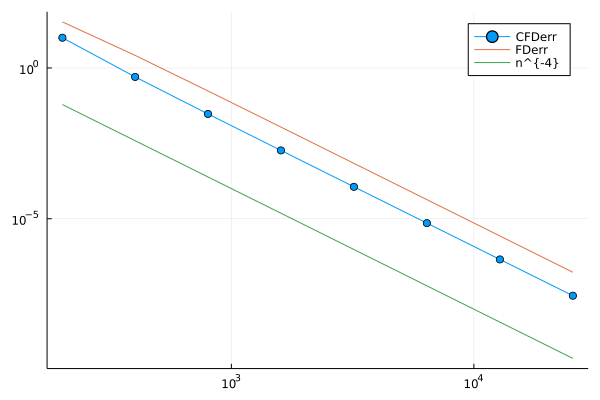

In [10]:
plot(npts4, err4, xaxis=:log10, yaxis=:log10, label="CFDerr", markershape=:circle)
plot!(fdnpts4, fderr4, label="FDerr")
plot!(fdnpts4, fdmodelerr4, label="n^{-4}")

In [11]:
ns = 6
npts4 = zeros(ns)
err4 = zeros(ns)
order = 4
per = 50.0
x4 = Array{Vector{Float64},1}(undef,ns)
errfunc4 = Array{Vector{Float64},1}(undef,ns)
for i = 1:ns
    tmp = calSecondDerivs(100, i, order, per)
    npts4[i] = tmp[6]
    err4[i] = tmp[7]
    x4[i] = tmp[3]
    errfunc4[i] = tmp[5]
end
modelerr4 = zeros(ns)
@. modelerr4 = 1.0e12/npts4^order;

In [12]:
plot(npts4, err4, xaxis=:log10, yaxis=:log10, label="CFDerr", markershape=:circle)
plot!(fdnpts4, modelerr4, label="n^{-4}")

BoundsError: BoundsError: attempt to access 6-element Vector{Float64} at index [1:8]

In [13]:
npts6 = zeros(ns)
err6 = zeros(ns)
order = 6
x6 = Array{Vector{Float64},1}(undef,ns)
errfunc6 = Array{Vector{Float64},1}(undef,ns)
for i = 1:ns
    tmp = calFirstDerivs(100, i, order, per)
    npts6[i] = tmp[6]
    err6[i] = tmp[7]
    x6[i] = tmp[3]
    errfunc6[i] = tmp[5]
end
modelerr6 = zeros(ns)
@. modelerr6 = 1.0e8/npts6^6;

In [14]:
fdnpts6 = zeros(ns)
fderr6 = zeros(ns)
fdx6 = Array{Vector{Float64},1}(undef,ns)
fderrfunc6 = Array{Vector{Float64},1}(undef,ns)
for i = 1:ns
    tmp = calFirstStdDerivs(100, i, order, per)
    fdnpts6[i] = tmp[6]
    fderr6[i] = tmp[7]
    fdx6[i] = tmp[3]
    fderrfunc6[i] = tmp[5]
end
fdmodelerr6 = zeros(ns)
@. fdmodelerr6 = 1.0e8/fdnpts6^order;

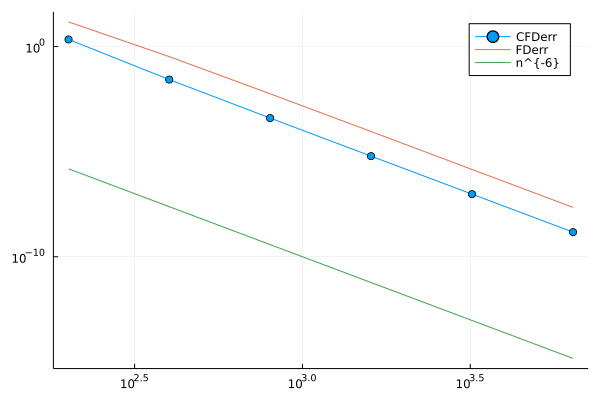

In [15]:
plot(npts6, err6, xaxis=:log10, yaxis=:log10, label="CFDerr", markershape=:circle)
plot!(fdnpts6, fderr6, label="FDerr")
plot!(npts6, modelerr6, label="n^{-6}")

In [16]:
ns=8
npts6 = zeros(ns)
err6 = zeros(ns)
order = 6
x6 = Array{Vector{Float64},1}(undef,ns)
errfunc6 = Array{Vector{Float64},1}(undef,ns)
for i = 1:ns
    tmp = calSecondDerivs(100, i, order, per)
    npts6[i] = tmp[6]
    err6[i] = tmp[7]
    x6[i] = tmp[3]
    errfunc6[i] = tmp[5]
end
modelerr6 = zeros(ns)
@. modelerr6 = 1.0e8/npts6^6;

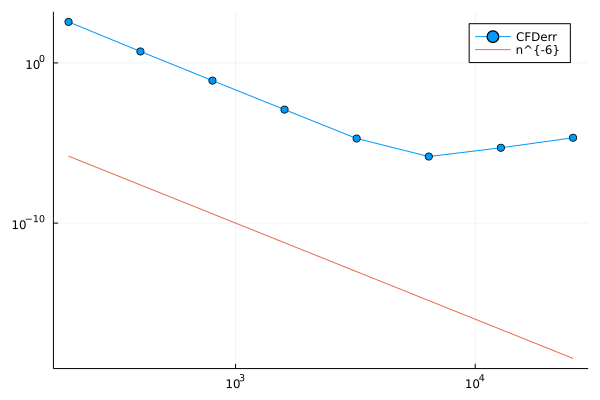

In [17]:
plot(npts6, err6, xaxis=:log10, yaxis=:log10, label="CFDerr", markershape=:circle)
plot!(npts6, modelerr6, label="n^{-6}")

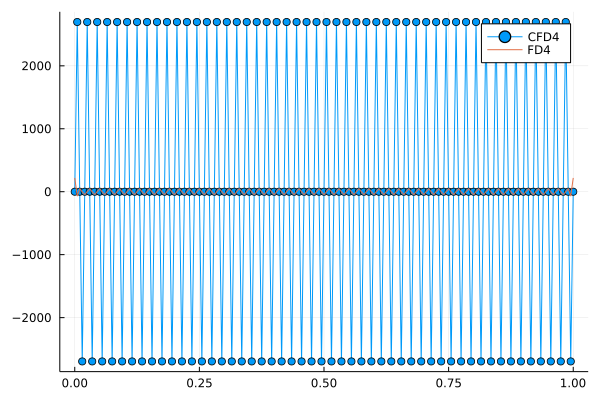

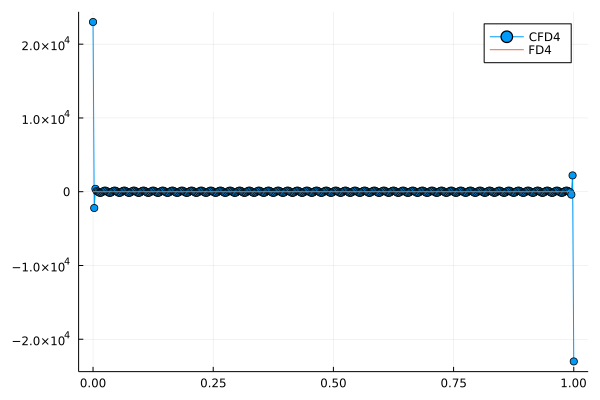

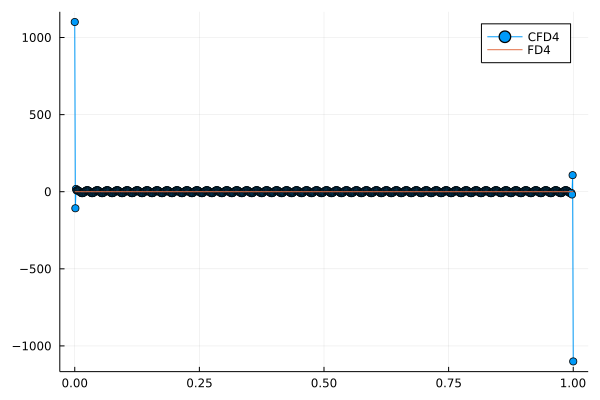

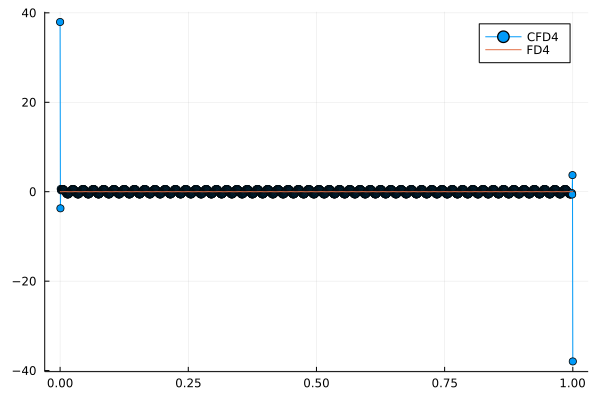

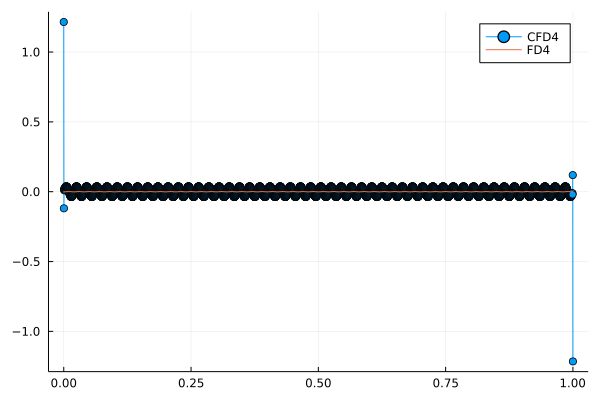

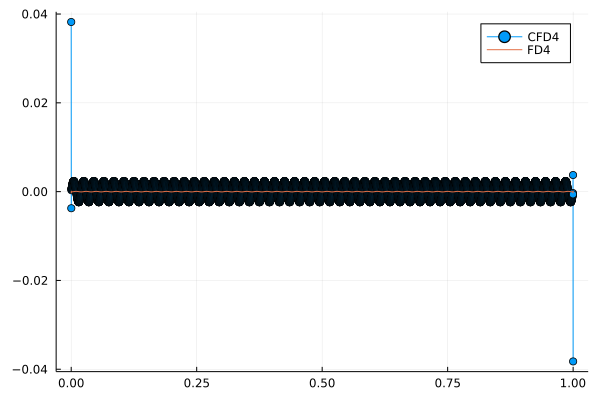

LoadError: BoundsError: attempt to access 6-element Vector{Vector{Float64}} at index [7]

In [18]:
for i = 1:ns
    plot(x4[i],errfunc4[i],markershape=:circle,label="CFD4")
    display(plot!(fdx4[i], fderrfunc4[i],label="FD4"))
end

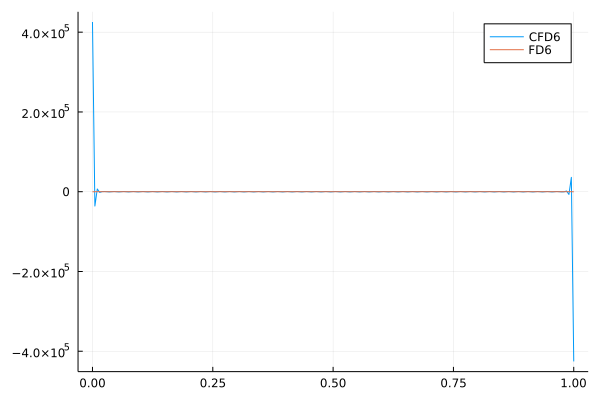

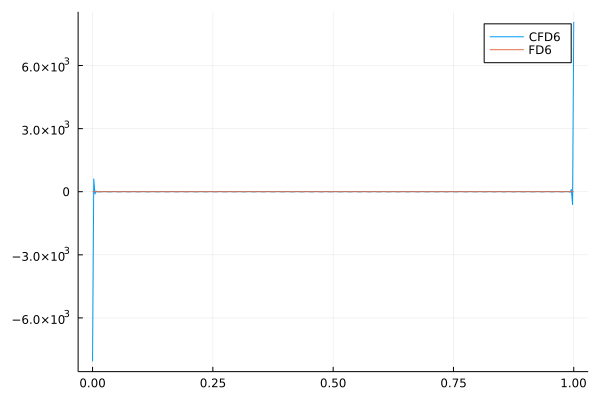

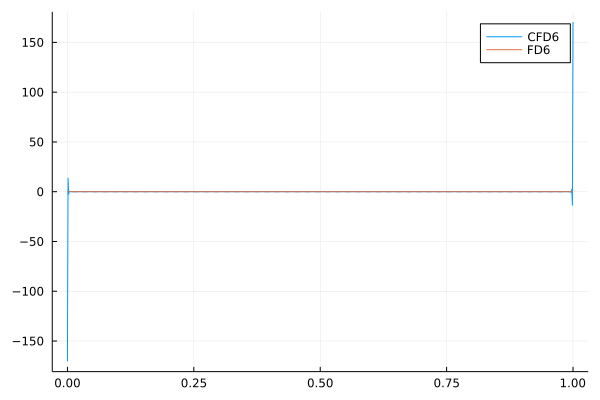

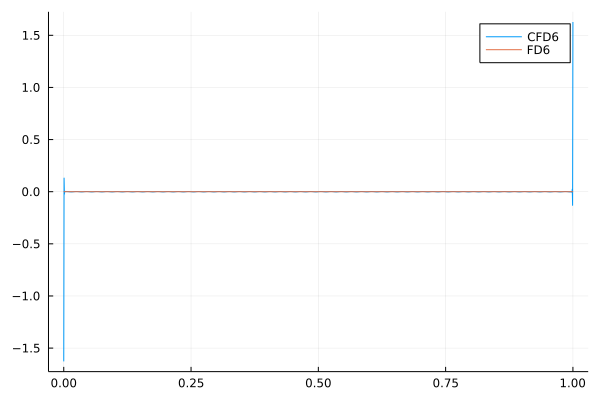

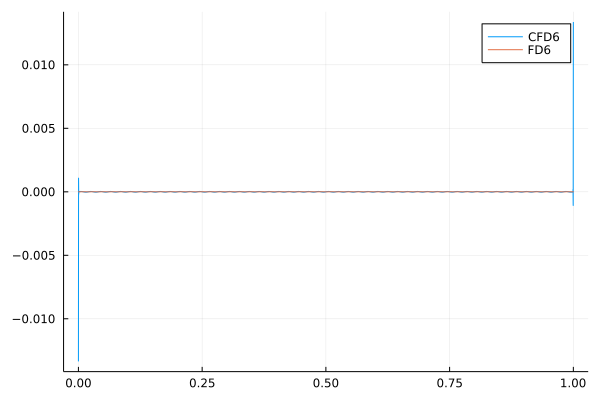

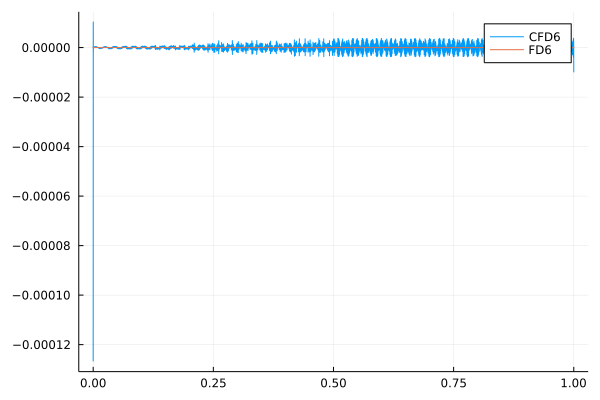

LoadError: BoundsError: attempt to access 6-element Vector{Vector{Float64}} at index [7]

In [19]:
for i = 1:ns
    plot(x6[i],errfunc6[i],label="CFD6")
    display(plot!(fdx6[i], fderrfunc6[i],label="FD6"))
end

## Calculate FD error as a function of frequency

In [20]:
np = 10
nper = zeros(np)
perr4 = zeros(np)
perr6 = zeros(np)
fdperr4 = zeros(np)
fdperr6 = zeros(np)
per0 = 5.0
nx0 = 500
for i = 1:np
    per = per0*i*1.5
    tmp = calFirstDerivs(nx0, 0, 4, per)
    nper[i] = per
    perr4[i] = tmp[7]
    tmp = calFirstDerivs(nx0, 0, 6, per)
    perr6[i] = tmp[7]
    
    tmp = calFirstStdDerivs(nx0, 0, 4, per)
    fdperr4[i] = tmp[7]
    tmp = calFirstStdDerivs(nx0, 0, 6, per)
    fdperr6[i] = tmp[7]
end
#modelerr = zeros(ns)
#@. modelerr = 1.0e5/npts^order;

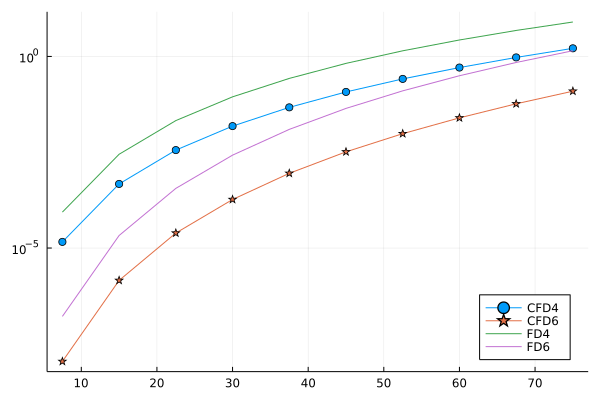

In [21]:
#plot(nper, [perr4,perr6], xaxis=:log10, yaxis=:log10)
plot(nper, perr4, yaxis=:log10, label="CFD4", markershape=:circle,legend=:bottomright)
plot!(nper, perr6, label="CFD6", markershape=:star)
plot!(nper, fdperr4, label="FD4")
plot!(nper, fdperr6, label="FD6")

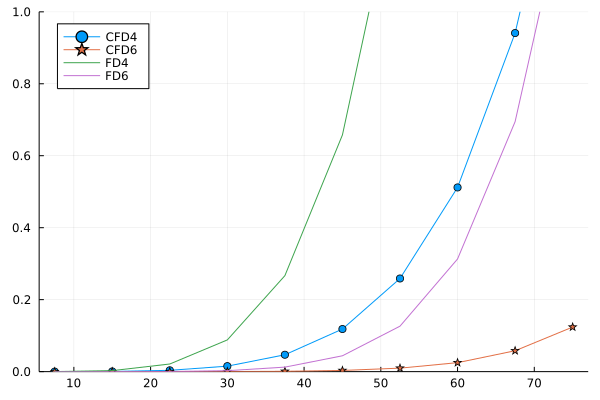

In [22]:
plot(nper, perr4, label="CFD4", ylim=(0.0,-1.0e-1), markershape=:circle,legend=:topleft)
plot!(nper, perr6, label="CFD6", markershape=:star)
plot!(nper, fdperr4, label="FD4")
plot!(nper, fdperr6, label="FD6")